<a href="https://colab.research.google.com/github/shashank-dj/Decision-tree/blob/main/DECISION_TREES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree algorithm using scikit learn



In [ ]:
#import the iris dataset
from sklearn.datasets import load_iris
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#load the iris data set
iris = load_iris()
x = iris.data[:,2:]
y = iris.target

In [ ]:
x, y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [ ]:
#create a classifier
dt_clf = DecisionTreeClassifier(max_depth=2)
#train the model
dt_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names= iris.target_names,
    rounded=True,
    filled=True
)

In [ ]:
from IPython.display import Image
Image('iris_tree.png')

 export_graphviz(dt_clf,
                  out_file=image_path("iris_tree.dot"),
                  feature_names = iris.feature_names[2:],
                  class_names = iris.target_names, rounded = True, filled=True)

estimating class probabilities

In [ ]:
dt_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
dt_clf.predict([[5,1.5]])

array([1])

# Regression model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_reg,
    out_file='iris_tree_reg.dot',
    feature_names=iris.feature_names[2:],
    class_names= iris.target_names,
    rounded=True,
    filled=True
)

In [ ]:
Image('iris_tree_reg.png')

# Decision boundaries are visualized

# 1.Decision boundaries of two classes

Let's generate some custom data points 

In [ ]:
from sklearn.datasets import make_classification,make_moons,make_circles,make_blobs

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [ ]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.3, factor=0.5,random_state=1),
            make_blobs()]

Tree based decision boundaries.

consider three models

1.   decison tree
2.   random forest
3.   extra trees



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
names = ["Desicion Tree","Random Forest","ExtraTrees"]
#create classifiers
treeclassifiers = [DecisionTreeClassifier(max_depth=5),
                   RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1),
                   ExtraTreesClassifier()]

Plotting the decision surface

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

In [ ]:
figure = plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

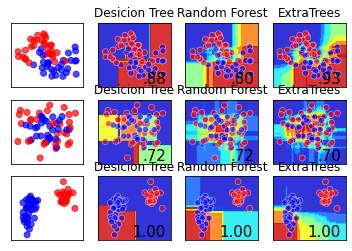

In [ ]:
h = 0.02
i = 1
for ds in datasets:
  #preprocess data, split into training and testing data
  X , y = ds
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

  x_min, x_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min,x_max, h),
                       np.arange(y_min, y_max, h))
  #plotting the dataset
  cm = plt.cm.jet
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), len(treeclassifiers) + 1,i)

  #plot the training points
  ax.scatter(X_train[:,0],X_train[:,1], c =y_train, cmap= cm_bright, alpha=0.7)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  #iterate over classifiers
  for name, clf in zip(names, treeclassifiers):
    ax = plt.subplot(len(datasets), len(treeclassifiers)+1,i)
    clf.fit(X_train,y_train)
    score = clf.score(X_test, y_test)

            # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:

      Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

        # Plot also the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   #alpha=0.6)

      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      ax.set_title(name)
      ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
      i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()
